In [5]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd

df = pd.read_csv("../data/spot_data.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

close_prices = df["Close"]


In [6]:
from utils.hv_calculator import calculate_historical_volatility

hv_20 = calculate_historical_volatility(close_prices, window=20)


In [7]:
from utils.iv_simulator import simulate_implied_volatility

iv_sim = simulate_implied_volatility(hv_20, mode="random")


In [8]:
from utils.strategy_rules import generate_volatility_signals

signals = generate_volatility_signals(iv_sim, hv_20)

# Optional: Check counts
print(signals.value_counts())


Hold    166
Buy     114
Sell    110
Name: count, dtype: int64


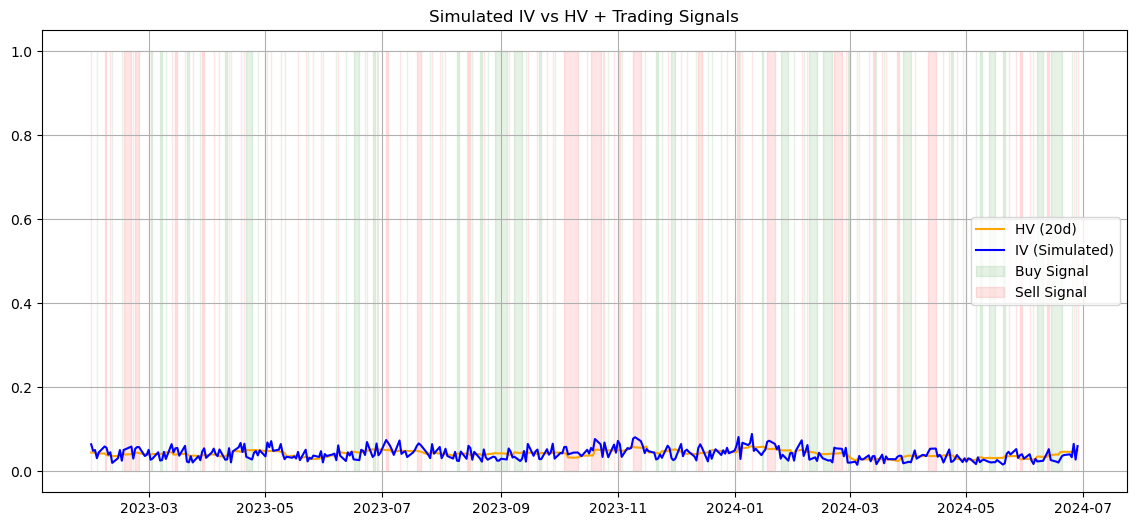

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(hv_20.index, hv_20, label="HV (20d)", color="orange")
plt.plot(iv_sim.index, iv_sim, label="IV (Simulated)", color="blue")
plt.fill_between(iv_sim.index, 0, 1, where=signals=="Buy", color="green", alpha=0.1, label="Buy Signal")
plt.fill_between(iv_sim.index, 0, 1, where=signals=="Sell", color="red", alpha=0.1, label="Sell Signal")
plt.legend()
plt.title("Simulated IV vs HV + Trading Signals")
plt.grid()
plt.show()


In [10]:
from utils.payoff_calculator import simulate_straddle_payoff

results = simulate_straddle_payoff(close_prices, signals, hold_period=5, premium_pct=0.03)
results.head()


,date,signal,entry,exit,days_held,premium,commission,slippage,pnl
0,2023-01-30,Sell,17901.983877,17801.161056,5,537.059516,35.803968,17.901984,382.530744
1,2023-02-02,Buy,17822.834063,17795.614927,1,534.685022,35.645668,17.822834,-560.934388
2,2023-02-06,Sell,17801.161056,17687.694326,5,534.034832,35.602322,17.801161,367.164618
3,2023-02-07,Sell,17743.611377,17780.308235,5,532.308341,35.487223,17.743611,442.380650
4,2023-02-09,Sell,17732.364344,17726.747827,5,531.970930,35.464729,17.732364,473.157321


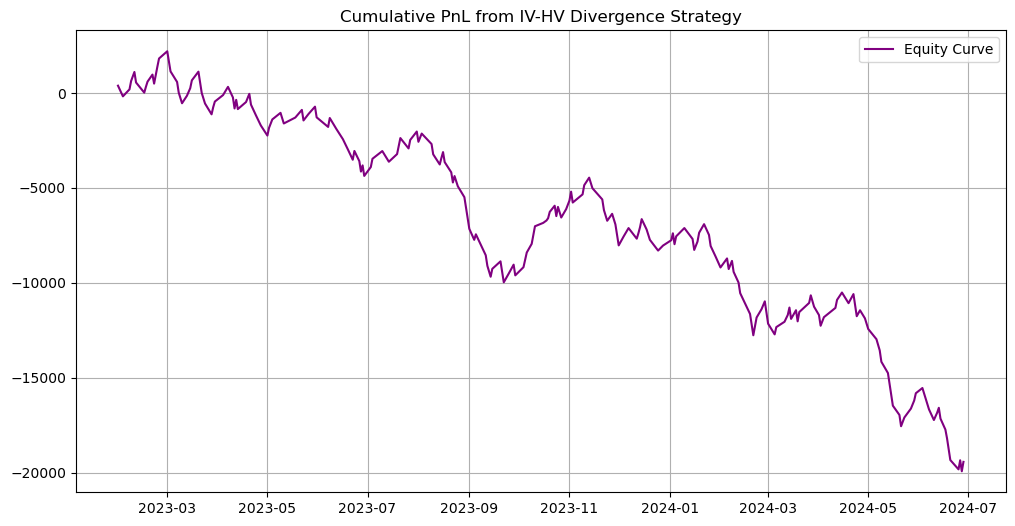

In [11]:
results["cum_pnl"] = results["pnl"].cumsum()

plt.figure(figsize=(12,6))
plt.plot(results["date"], results["cum_pnl"], label="Equity Curve", color="purple")
plt.title("Cumulative PnL from IV-HV Divergence Strategy")
plt.grid()
plt.legend()
plt.show()


In [15]:
import pandas as pd
df = pd.read_csv("../outputs/param_grid_results.csv")
df.sort_values("Sharpe", ascending=False).head(20)


,upper,lower,stop_loss_pct,Sharpe,TotalRet,MaxDraw,WinRate
2,1.1,0.6,1.5,7.939252,35221.624768,1602.516905,0.772222
0,1.1,0.6,0.5,7.234873,33483.145518,1695.904222,0.772222
1,1.1,0.6,1.0,7.224064,33464.678369,1695.904222,0.772222
14,1.2,0.6,1.5,4.758660,17420.805645,1851.431621,0.696296
12,1.2,0.6,0.5,4.107200,15682.326395,2035.728948,0.696296
13,1.2,0.6,1.0,4.098289,15663.859246,2035.728948,0.696296
5,1.1,0.7,1.5,2.085749,13197.767338,4268.074352,0.620536
4,1.1,0.7,1.0,1.391779,9226.515445,5692.502875,0.620536
3,1.1,0.7,0.5,1.391342,9213.305563,5421.122781,0.620536
26,1.3,0.6,1.5,1.217870,3568.052787,3138.550054,0.594059
